1. Accept a user's name, age, and a list of their skills.
2. Pass the state through three nodes that:
    o First node: Personalizes the name field with a greeting.
    o Second node: Describes the user'S age.
    o Third node: Lists the user's skills in a formatted string.
3. The final OUtPUt in the field should be a combined message in this format result:

Output. "Linda, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, and LangGraph"

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import display, Image

In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str

In [7]:
def first_node(state: AgentState) -> AgentState:
    """Update the state for greeting the user"""

    state['result'] = f"Hii, {state['name']}. "

    return state

def second_node(state: AgentState) -> AgentState:
    """Update the state with user's age"""

    state['result'] += f"You are {state['age']} years old. "

    return state

def third_node(state: AgentState) -> AgentState:
    """Update the state with skills given by user"""

    state['result'] += f"You have skills in: {", ".join(state['skills'])}"

    return state

In [8]:
# Initialize the state graph
graph = StateGraph(AgentState)

# Add the nodes
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

# this is entry point
graph.set_entry_point("first_node")

# edge between first and second node, second_node and third_node
# 1st parameter is "from" node, 2nd parameter is "to" node
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")

# this is finish point
graph.set_finish_point("third_node")

# Compile the graph
app = graph.compile()

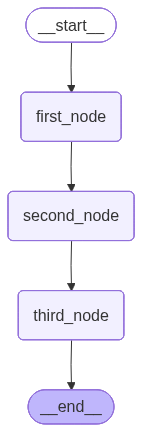

In [5]:
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
initial_state: AgentState = {
    "name": "Linda",
    "age": 22,
    "skills": ["Python", "JavaScript", "Machine Learning", "LangGraph"]
}

final_state: AgentState = app.invoke(initial_state)
final_state["result"]

'Hii, Linda. You are 22 years old. You have skills in: Python, JavaScript, Machine Learning, LangGraph'